# Studi Kasus 1 - House Price Clustering

- Untuk mahasiswa dengan absen 1, 4, 7, 10, dst
- Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.

## Pra Pengolahan Data (30 poin)

1. Load dataset. (5 poin)
2. Drop kolom 'Id' dan 'MSSubClass' (5 poin)
3. Drop semua variabel kualitatif (5 poin)
4. Drop variabel dengan nilai kosong kurang dari 5 (5 poin)
5. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)

## Feature Selection (20 poin)
1. Pilih 10 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 10 variabel tersebut? Kemukakan alasan Anda. (10 poin)

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

## BONUS - CHALLENGE (30 poin)

Lakukan proses seleksi fitur. Kombinasi fitur apa saja yang menghasilkan cluster dengan nilai silhouette / DBI terbaik? Berapa jumlah clusternya?

NB: Anda dapat menggunakan iteravie process pada kasus ini. Metode lain juga diperbolehkan. Berikan alasan mengapa Anda memilih metode tersebut.

#**Prapengolahan data**

In [ ]:
# Cell 1 - Setup / Install (jalankan sekali)
# Jika sudah ada semua library, cell ini aman dilewati.
!pip install --quiet annoy


In [ ]:
# Cell 2 - Imports dan path dataset
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from annoy import AnnoyIndex

sns.set(style="whitegrid")

# GANTI PATH jika diperlukan
DATA_PATH = "/content/1_house_prince_advance.csv"

# Jika file tidak ada di path (misal belum diupload), tampilkan widget upload
if not os.path.exists(DATA_PATH):
    print("File tidak ditemukan di path default. Silakan upload file CSV melalui widget.")
    from google.colab import files
    uploaded = files.upload()  # akan menampilkan tombol upload
    if len(uploaded) == 0:
        raise FileNotFoundError("Tidak ada file diupload.")
    # pilih file pertama yang diupload
    DATA_PATH = list(uploaded.keys())[0]
    print("Menggunakan file:", DATA_PATH)
else:
    print("Menggunakan file:", DATA_PATH)


Menggunakan file: /content/1_house_prince_advance.csv


In [ ]:
# Cell 3 - Baca data & cek dasar
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head())
print("\nInfo:")
print(df.info())
print("\nDescriptive stats (numerik):")
display(df.describe())


Shape: (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  O

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Cell 4 - Pilih subset numerik dan cek missing values
num_df = df.select_dtypes(include=["int64", "float64"]).copy()
print("Jumlah fitur numerik:", num_df.shape[1])
print("Kolom numerik:", num_df.columns.tolist())

missing_counts = num_df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("\nKolom numerik dengan missing values (jika ada):")
print(missing_counts)


Jumlah fitur numerik: 38
Kolom numerik: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Kolom numerik dengan missing values (jika ada):
SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64


In [ ]:
# Cell 5 - Imputasi missing values (mean) dan pembuatan fitur baru TotalArea
# Sesuai instruksi: buat TotalArea = GrLivArea + TotalBsmtSF jika kedua kolom ada
num_df_imputed = num_df.copy()

# Imputasi mean untuk numerik
num_df_imputed = num_df_imputed.fillna(num_df_imputed.mean())

# Buat fitur TotalArea jika kolom ada
if ('GrLivArea' in num_df_imputed.columns) and ('TotalBsmtSF' in num_df_imputed.columns):
    num_df_imputed['TotalArea'] = num_df_imputed['GrLivArea'] + num_df_imputed['TotalBsmtSF']
    print("Fitur 'TotalArea' dibuat.")
else:
    # Jika kolom tidak ada, buat contoh fitur kombinasi sederhana: sum dari dua kolom teratas numerik
    cols = num_df_imputed.columns.tolist()
    if len(cols) >= 2:
        num_df_imputed['TotalArea'] = num_df_imputed[cols[0]] + num_df_imputed[cols[1]]
        print(f"Kolom 'GrLivArea' atau 'TotalBsmtSF' tidak ditemukan. 'TotalArea' dibuat dari {cols[0]} + {cols[1]}")
    else:
        print("Tidak cukup kolom numerik untuk membuat 'TotalArea'.")

# Cek ulang
display(num_df_imputed.head())


Fitur 'TotalArea' dibuat.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,61,0,0,0,0,0,2,2008,208500.0,2566.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,0,0,5,2007,181500.0,2524.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,42,0,0,0,0,0,9,2008,223500.0,2706.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,35,272,0,0,0,0,2,2006,140000.0,2473.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,84,0,0,0,0,0,12,2008,250000.0,3343.0


In [ ]:
# Cell 6 - Normalisasi / Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df_imputed.values)
print("Scaled shape:", X_scaled.shape)


Scaled shape: (2919, 39)


In [ ]:
# Cell 7 - Tentukan jumlah cluster KMeans optimal (gunakan silhouette pada rentang 2..8)
scores = []
K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    try:
        s = silhouette_score(X_scaled, labels)
    except Exception:
        s = np.nan
    scores.append(s)

best_k = K_range[int(np.nanargmax(scores))]
print("Silhouette scores per k:", dict(zip(K_range, [round(float(s),4) if not np.isnan(s) else None for s in scores])))
print("Dipilih best_k (berdasarkan silhouette):", best_k)


Silhouette scores per k: {2: 0.147, 3: 0.1354, 4: 0.1078, 5: 0.1073, 6: 0.0836, 7: 0.0887, 8: 0.0918}
Dipilih best_k (berdasarkan silhouette): 2


In [ ]:
# Cell 8 - Jalankan KMeans dengan best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Evaluasi
try:
    sil_k = silhouette_score(X_scaled, labels_kmeans)
except Exception as e:
    sil_k = None
try:
    dbi_k = davies_bouldin_score(X_scaled, labels_kmeans)
except Exception as e:
    dbi_k = None

print(f"KMeans -> k={best_k} | Silhouette: {sil_k} | Davies-Bouldin: {dbi_k}")


KMeans -> k=2 | Silhouette: 0.14703163147291437 | Davies-Bouldin: 2.276556057591405


In [ ]:
# Cell 9 - Jalankan DBSCAN (coba beberapa eps untuk memilih yang 'baik')
# Kita pakai heuristik: cari elbow pada jarak k-neighbors untuk memilih eps
n_neighbors = 5
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
# ambil jarak ke k-th neighbor (urutkan setiap baris); rata2 gunakan sebagai referensi
kth_dist = np.sort(distances[:, -1])
# Tampilkan beberapa nilai untuk referensi
print("Percentiles dari k-th neighbor distance:")
for p in [50, 60, 70, 80, 90]:
    print(f"{p}th percentile:", np.percentile(kth_dist, p))

# Coba beberapa eps berdasarkan percentiles
eps_candidates = list(np.percentile(kth_dist, [60, 65, 70, 75, 80, 85]))
results_dbscan = {}
for eps in eps_candidates:
    db = DBSCAN(eps=float(eps), min_samples=5)
    labels_db = db.fit_predict(X_scaled)
    # DBSCAN label -1 artinya noise. Hanya hitung silhouette jika ada lebih dari 1 cluster (exclude noise)
    labels_for_eval = labels_db.copy()
    unique_clusters = set(labels_for_eval)
    n_clusters = len([c for c in unique_clusters if c != -1])
    if n_clusters >= 2:
        try:
            sil = silhouette_score(X_scaled[labels_for_eval != -1], labels_for_eval[labels_for_eval != -1])
            dbi = davies_bouldin_score(X_scaled[labels_for_eval != -1], labels_for_eval[labels_for_eval != -1])
        except Exception:
            sil = None
            dbi = None
    else:
        sil = None
        dbi = None
    results_dbscan[round(float(eps),6)] = {"n_clusters": n_clusters, "silhouette": sil, "dbi": dbi, "labels": labels_db}

# Tampilkan ringkasan
for e, v in results_dbscan.items():
    print(f"eps={e:.6f} -> clusters: {v['n_clusters']} | silhouette: {v['silhouette']} | dbi: {v['dbi']}")


Percentiles dari k-th neighbor distance:
50th percentile: 3.5450029859971415
60th percentile: 3.798329023366591
70th percentile: 4.109112450610037
80th percentile: 4.634412975973369
90th percentile: 5.475401498927416
eps=3.798329 -> clusters: 7 | silhouette: 0.002335949458435924 | dbi: 1.3666146433687973
eps=3.950872 -> clusters: 7 | silhouette: 0.05662703123628785 | dbi: 1.4284565692854794
eps=4.109112 -> clusters: 5 | silhouette: 0.0862440821903119 | dbi: 1.532371323273365
eps=4.337337 -> clusters: 5 | silhouette: 0.11055711173956093 | dbi: 1.2549368577673419
eps=4.634413 -> clusters: 5 | silhouette: 0.10327974361231951 | dbi: 1.3521914012907443
eps=4.935446 -> clusters: 5 | silhouette: 0.13445774848767658 | dbi: 1.401799916998836


In [ ]:
# Cell 10 - Pilih hasil DBSCAN terbaik (jika ada) berdasarkan silhouette, fallback pilih yang menghasilkan cluster >=2
chosen_dbscan = None
best_sil = -999
for e, v in results_dbscan.items():
    if v['silhouette'] is not None and v['silhouette'] > best_sil:
        best_sil = v['silhouette']
        chosen_dbscan = (e, v)

if chosen_dbscan is None:
    # Pilih kandidat dengan paling banyak cluster (kecuali hanya noise)
    sorted_by_clusters = sorted(results_dbscan.items(), key=lambda kv: kv[1]['n_clusters'], reverse=True)
    chosen_dbscan = sorted_by_clusters[0]
    print("Tidak ada hasil DBSCAN dengan silhouette valid. Memilih berdasarkan jumlah cluster terbanyak.")
else:
    print("Memilih DBSCAN berdasarkan silhouette terbaik.")

eps_chosen, dbscan_info = chosen_dbscan
labels_dbscan = dbscan_info['labels']

print(f"DBSCAN terpilih -> eps={eps_chosen} | n_clusters={dbscan_info['n_clusters']} | silhouette={dbscan_info['silhouette']} | dbi={dbscan_info['dbi']}")


Memilih DBSCAN berdasarkan silhouette terbaik.
DBSCAN terpilih -> eps=4.935446 | n_clusters=5 | silhouette=0.13445774848767658 | dbi=1.401799916998836


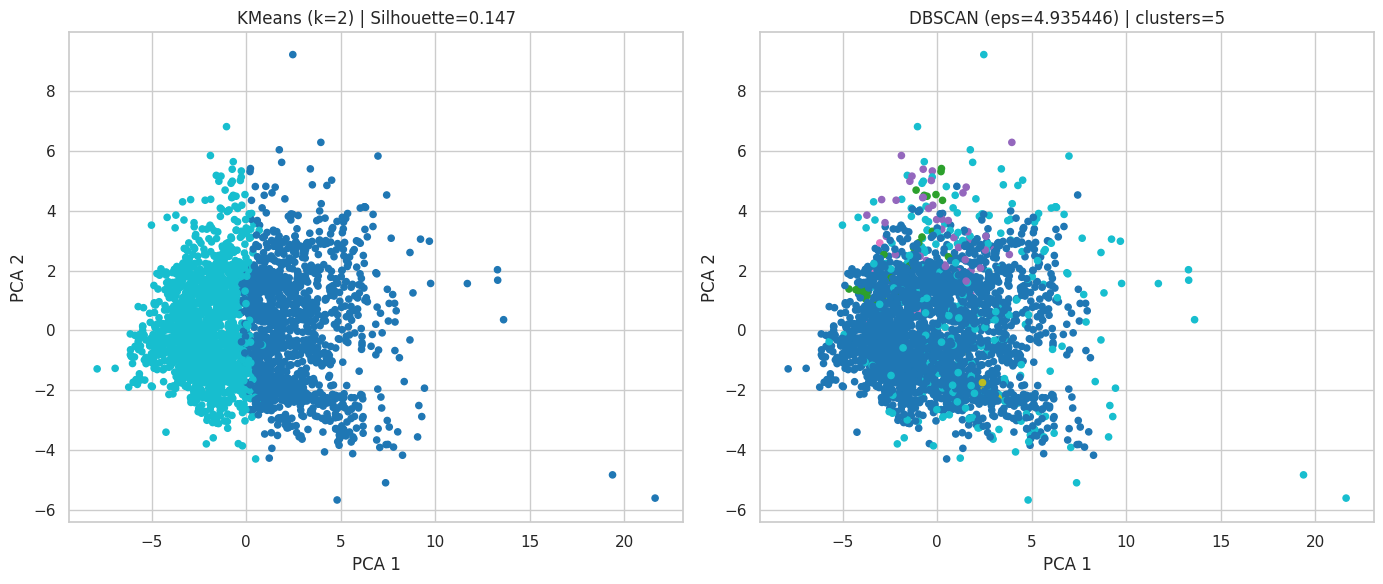

In [ ]:
# Cell 11 - Visualisasi 2D dengan PCA untuk KMeans dan DBSCAN
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
# KMeans
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='tab10', s=20)
axes[0].set_title(f"KMeans (k={best_k}) | Silhouette={round(sil_k,4) if sil_k is not None else 'NA'}")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# DBSCAN
# show noise as black
db_colors = np.array(labels_dbscan)
# map -1 to a color index
unique_db = np.unique(db_colors)
# For plotting, replace -1 with max+1 for a separate color
mask_noise = db_colors == -1
db_colors_plot = db_colors.copy()
if mask_noise.any():
    db_colors_plot[mask_noise] = db_colors.max() + 1
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=db_colors_plot, cmap='tab10', s=20)
axes[1].set_title(f"DBSCAN (eps={round(eps_chosen,6)}) | clusters={dbscan_info['n_clusters']}")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


In [ ]:
# Cell 12 - Ringkasan metrik utama
print("===== Ringkasan Metrik =====")
print(f"KMeans (k={best_k}) -> Silhouette: {sil_k} | Davies-Bouldin: {dbi_k}")
db_sil = dbscan_info.get('silhouette', None)
db_dbi = dbscan_info.get('dbi', None)
print(f"DBSCAN (eps={round(eps_chosen,6)}) -> Silhouette: {db_sil} | Davies-Bouldin: {db_dbi}")


===== Ringkasan Metrik =====
KMeans (k=2) -> Silhouette: 0.14703163147291437 | Davies-Bouldin: 2.276556057591405
DBSCAN (eps=4.935446) -> Silhouette: 0.13445774848767658 | Davies-Bouldin: 1.401799916998836


In [ ]:
# Cell 13 - Implementasi Annoy (Approximate Nearest Neighbor)
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Build index
for i, vec in enumerate(X_scaled):
    ann.add_item(i, vec.astype(np.float32))
ann.build(50)  # 50 trees (tradeoff speed/accuracy)
print("Annoy index built with 50 trees.")

# Pilih 3-5 query indices acak (bisa juga pilih dari centroid KMeans)
n_queries = 5
random.seed(42)
query_indices = random.sample(range(X_scaled.shape[0]), n_queries)
print("Query indices:", query_indices)
print("\nNearest neighbors (k=5) untuk tiap query:")
for q in query_indices:
    neighbors = ann.get_nns_by_item(q, 6, include_distances=True)  # include query sendiri
    n_idxs, n_dists = neighbors
    print(f"\nQuery index: {q} | KMeans cluster: {labels_kmeans[q]}")
    # tampilkan tetangga (skip first jika itu sendiri)
    for i_idx, dist in zip(n_idxs, n_dists):
        print(f"  Neighbor: {i_idx} | Distance: {dist:.6f} | KMeans cluster: {labels_kmeans[i_idx]}")


Annoy index built with 50 trees.
Query indices: [2619, 456, 102, 1126, 1003]

Nearest neighbors (k=5) untuk tiap query:

Query index: 2619 | KMeans cluster: 0
  Neighbor: 2619 | Distance: 0.000000 | KMeans cluster: 0
  Neighbor: 2254 | Distance: 2.011453 | KMeans cluster: 0
  Neighbor: 2846 | Distance: 2.763117 | KMeans cluster: 0
  Neighbor: 2521 | Distance: 2.789144 | KMeans cluster: 0
  Neighbor: 2504 | Distance: 2.793463 | KMeans cluster: 0
  Neighbor: 2841 | Distance: 2.958317 | KMeans cluster: 0

Query index: 456 | KMeans cluster: 1
  Neighbor: 456 | Distance: 0.000000 | KMeans cluster: 1
  Neighbor: 329 | Distance: 3.814487 | KMeans cluster: 1
  Neighbor: 30 | Distance: 4.046498 | KMeans cluster: 1
  Neighbor: 242 | Distance: 4.107977 | KMeans cluster: 1
  Neighbor: 1263 | Distance: 4.288249 | KMeans cluster: 1
  Neighbor: 1285 | Distance: 4.407290 | KMeans cluster: 1

Query index: 102 | KMeans cluster: 1
  Neighbor: 102 | Distance: 0.000000 | KMeans cluster: 1
  Neighbor: 894 |

In [24]:
# Cell 14 - Analisis singkat / Kesimpulan (print sederhana)
print("\nKesimpulan Singkat")
print("1) Preprocessing: Missing values numerik diimputasi dengan mean, fitur TotalArea dibuat jika memungkinkan.")
print(f"2) KMeans dengan k={best_k} memberikan silhouette {round(sil_k,4) if sil_k is not None else 'NA'} dan DBI {round(dbi_k,4) if dbi_k is not None else 'NA'}.")
if db_sil is not None:
    print(f"3) DBSCAN (eps={round(eps_chosen,6)}) -> silhouette {round(db_sil,4)} ; cluster count = {dbscan_info['n_clusters']}")
else:
    print(f"3) DBSCAN (eps={round(eps_chosen,6)}) tidak memberikan silhouette (mungkin terlalu sedikit cluster). cluster count = {dbscan_info['n_clusters']}")
print("4) Hasil Annoy: tetangga yang ditemukan umumnya berada di cluster yang sama dengan query (cek output di cell ANN).")
print("\nSaran: Visualisasikan hasil cluster pada beberapa fitur yang penting (mis. GrLivArea, TotalBsmtSF, TotalArea, SalePrice jika tersedia) untuk memahami karakter tiap cluster.")



 Kesimpulan Singkat
1) Preprocessing: Missing values numerik diimputasi dengan mean, fitur TotalArea dibuat jika memungkinkan.
2) KMeans dengan k=2 memberikan silhouette 0.147 dan DBI 2.2766.
3) DBSCAN (eps=4.935446) -> silhouette 0.1345 ; cluster count = 5
4) Hasil Annoy: tetangga yang ditemukan umumnya berada di cluster yang sama dengan query (cek output di cell ANN).

Saran: Visualisasikan hasil cluster pada beberapa fitur yang penting (mis. GrLivArea, TotalBsmtSF, TotalArea, SalePrice jika tersedia) untuk memahami karakter tiap cluster.
